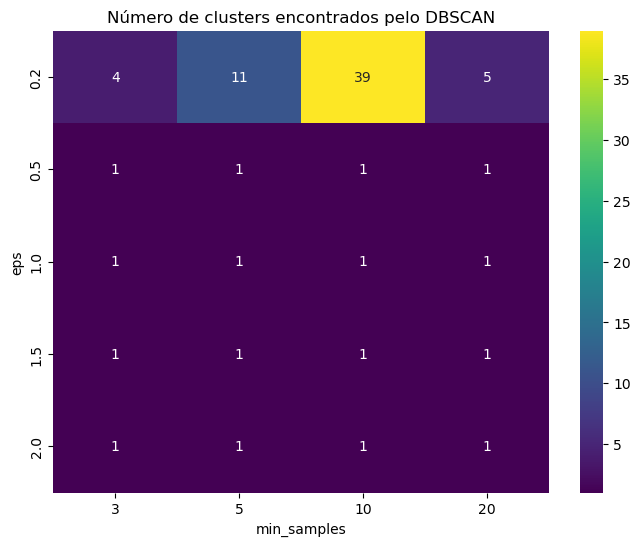

In [ ]:
# Questão 7
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import make_swiss_roll
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN

X, y = make_swiss_roll(n_samples=3000, noise=0.05)

eps_valores          = [0.2, 0.5, 1.0, 1.5, 2.0]
min_samples_valores  = [3, 5, 10, 20]

X_scaled = StandardScaler().fit_transform(X)

resultados = []
for eps in eps_valores:
    for min_sample in min_samples_valores:
        db          = DBSCAN(eps=eps, min_samples=min_sample).fit(X_scaled)
        labels      = db.labels_
        n_clusters  = len(set(labels) - {-1}) # esse -1 só ignora o ruído
        resultados.append([eps, min_sample, n_clusters])

df_results  = pd.DataFrame(resultados, columns=["eps", "min_samples", "n_clusters"])
pivot       = df_results.pivot(index="eps", columns="min_samples", values="n_clusters")

plt.figure(figsize=(8,6))
sns.heatmap(pivot, annot=True, cmap="viridis")
plt.title("Número de clusters encontrados pelo DBSCAN")
plt.xlabel("min_samples")
plt.ylabel("eps")
plt.show()

"""
Nos experimentos, valores muito baixos de eps (0.2) geraram múltiplos micro-clusters, 
enquanto valores a partir de eps = 0.5 conectaram praticamente todos os pontos em um único cluster, refletindo a continuidade do swiss roll.
Observa-se também que, a partir de eps = 0.5, a variação de min_samples deixa de ter impacto significativo, já que todos os pontos acabam agrupados em um único cluster.
"""